#Kaggle competition &mdash; House prices
<p>Competition instructions: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview </p>
<p><b>Goal</b>: to use feature engineering, random forests, and gradient boosting to predict the sales price (SalePrice) in dollars for each house (Id) in the test set. </p>
<p><b>Metric</b>: submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)</p>
<p><b>Submission file format</b>: submit a CSV file containing a header and the following format:</p>
Id,SalePrice<br>
1461,169000.1<br>
1462,187724.1233<br>
1463,175221<br>
etc.

# Install and load packages

In [ ]:
# Python version
!python --version

Python 3.10.12


In [ ]:
import importlib.util
import subprocess
import sys

# List of packages to check and install
packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn', 'xgboost']

# Function to install a package using pip
def install(package):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

# Check and install missing packages
for package in packages:
    if importlib.util.find_spec(package) is None:
        print(f"{package} is not installed. Installing...")
        install(package)
    else:
        print(f"{package} is already installed.")

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
scikit-learn is not installed. Installing...
xgboost is already installed.


In [ ]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Load and Inspect Data

In [ ]:
# Load datasets
train_data = pd.read_csv('/content/drive/MyDrive/ACADEMIA/DATA SCIENCE PROJECTS/Kaggle house prices/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ACADEMIA/DATA SCIENCE PROJECTS/Kaggle house prices/test.csv')

# Inspect the first few rows of the train dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Inspect the first few rows of the test dataset
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Examine the datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Exploratory Data Analysis (EDA)

## Visualise SalePrice data

Text(0.5, 1.0, 'Boxplot of the SalePrice data')

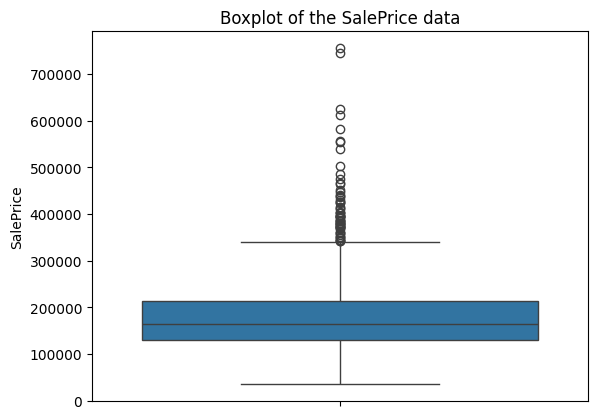

In [ ]:
# Examine the target variable (SalePrice) in the training set
sns.boxplot(train_data['SalePrice'])
plt.title("Boxplot of the SalePrice data")

Text(0.5, 0, 'SalePrice ($)')

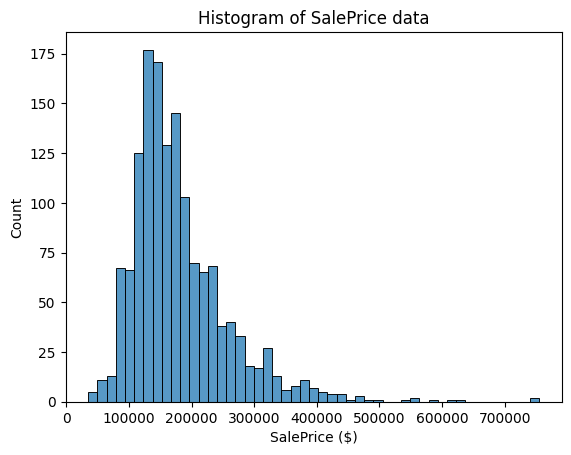

In [ ]:
sns.histplot(train_data['SalePrice'])
plt.title("Histogram of SalePrice data")
plt.xlabel("SalePrice ($)")

### Normality test

In [ ]:
#import shapiro wilkes test from scipy
from scipy.stats import shapiro

# Assuming 'train_data' is your DataFrame
sale_price_normality = train_data['SalePrice']

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(sale_price_normality)

# Print the results
print(f"Shapiro-Wilk test statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("The data are normally distributed (fail to reject H0).")
else:
    print("The data are not normally distributed (reject H0).")

Shapiro-Wilk test statistic: 0.8696714665902145
P-Value: 3.2061412312021656e-33
The data are not normally distributed (reject H0).


### Log transform SalePrice

Text(0.5, 0, 'log(SalePrice)')

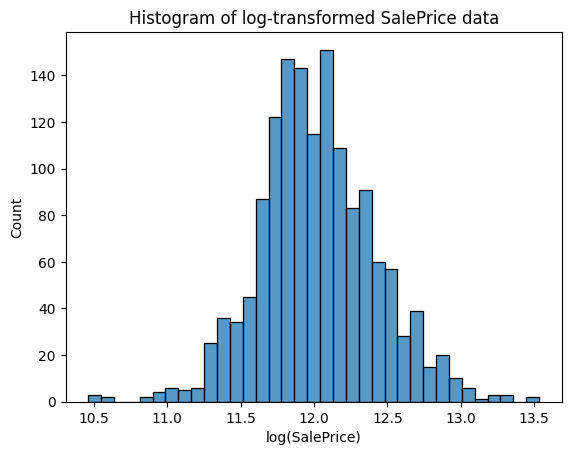

In [ ]:
# The SalePrice variable is not normally distributed, so log-transform
train_data["SalePrice"] = np.log(train_data["SalePrice"])
# And view the log-tranformed data
sns.histplot(train_data['SalePrice'])
plt.title("Histogram of log-transformed SalePrice data")
plt.xlabel("log(SalePrice)")

## Identify NaN values

Text(0.5, 0, 'Percentage NaN (%)')

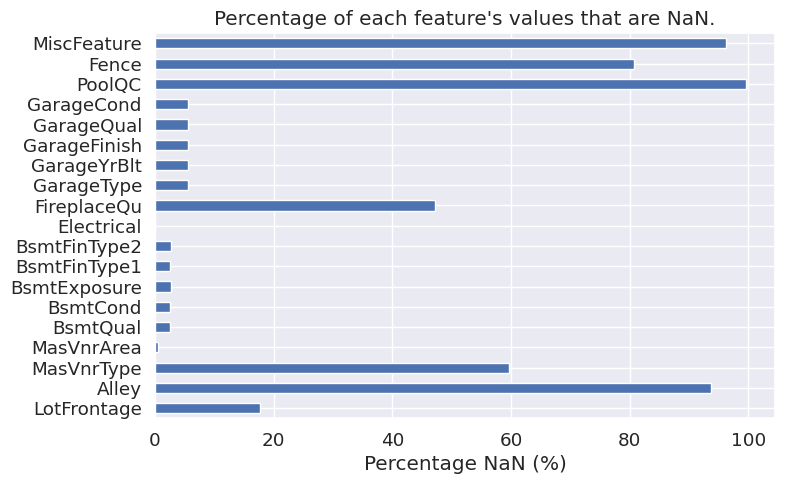

In [ ]:
# Check for NaN values
nan_values = 100 * train_data.isna().sum() / train_data.shape[0]
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
nan_values[nan_values > 0.01].plot(kind = "barh")
plt.title("Percentage of each feature's values that are NaN.")
plt.xlabel("Percentage NaN (%)")

In [ ]:
# Check for missing data
missing_train_data = train_data.isnull().sum().sort_values(ascending=False)
missing_train_data

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [ ]:
# Identify columns with only 1 unique value (because these won't contribute to prediction and can be removed)
one_unique_value_columns = train_data.columns[train_data.nunique() == 1]

# Print the result based on whether there are any such columns
if one_unique_value_columns.empty:
    print("No columns have only 1 unique value.")
else:
    print("Columns with only one unique value:")
    print(one_unique_value_columns.tolist())

No columns have only 1 unique value.


In [ ]:
# Read the data description file
with open('/content/drive/MyDrive/ACADEMIA/DATA SCIENCE PROJECTS/Kaggle house prices/data_description.txt', 'r') as file:
    data_description = file.read()

# Print the entire content because it contains important info as to how to code the data
# NOTE that some variables have NA but this does not mean missing, it means zero. E.g., For Alley, NA means No alley access.
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Feature info that will ensure appropriate model building:
In the following categorical variables, NA does not mean NaN or missing data, it means the following:
NA in Alley means No alley access.<br>
NA in BsmtFinType1 and BsmtFinType2 means No Basement.<br>
NA in GarageType and GarageFinish means No Garage.<br>
NA in Fence means No Fence.<br>
NA in MiscFeature means No misc feature.
<br><br>
MSSubClass should be recoded as categorical not numerical.
<br><br>
The following variables are ordinal on a scale of 1 (very poor) to 10 (very excellent): <br>
OverallQual, OverallCond
<br><br>
The following variables are ordinal and have 5 levels where Ex = Excellent, Gd = Good, TA = Average, Fa = Fair, and Po = Poor:<br>
ExterQual, ExterCond, HeatingQC, KitchenQual
<br><br>
The following variables are ordinal and have 5 levels where Ex = Excellent, Gd = Good, TA = Average, Fa = Fair, and NA = None:<br>
PoolQC
<br><br>
The following variables are ordinal and have 6 levels where Ex = Excellent, Gd = Good, TA = Average, Fa = Fair, Po = Poor, and NA = None:<br>
BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond
<br><br>
The following variables are ordinal and have 5 levels where Gd = Good Exposure, Av = Average Exposure, Mn = Mimimum Exposure, No = No Exposure, and NA = No Basement:<br>
BsmtExposure
<br><br>
The following variables are ordinal and have 7 levels where GLQ = Good Living Quarters, ALQ = Average Living Quarters, BLQ = Below Average Living Quarters, Rec = Average Rec Room, LwQ = Low Quality, Unf = Unfinshed, NA = No Basement:<br>
BsmtFinType1, BsmtFinType2
<br><br>
The following variables are binary (No, Yes):<br>
CentralAir

# Feature Engineering

## Recode variable types in train_data

In [ ]:
# Recode some of the variables based on observations made when inspecting the data in the previous section
# Recode MSSubClass as a category instead of a numerical value
train_data['MSSubClass'] = train_data['MSSubClass'].astype('category')

# Replace NA values (NaN) in the specified columns with corresponding labels
train_data['Alley'] = train_data['Alley'].fillna('No alley access')
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('No Basement')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('No Basement')
train_data['GarageType'] = train_data['GarageType'].fillna('No Garage')
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('No Garage')
train_data['Fence'] = train_data['Fence'].fillna('No Fence')
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('No misc feature')

# Convert OverallQual and OverallCond to ordered categorical variables
ordinal_scale = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_data['OverallQual'] = pd.Categorical(train_data['OverallQual'], categories=ordinal_scale, ordered=True)
train_data['OverallCond'] = pd.Categorical(train_data['OverallCond'], categories=ordinal_scale, ordered=True)

# Convert ExterQual, ExterCond, HeatingQC, and KitchenQual to ordered categorical variables
quality_scale_1 = ['Po', 'Fa', 'TA', 'Gd', 'Ex']  # Define the quality scale from Poor to Excellent
train_data['ExterQual'] = pd.Categorical(train_data['ExterQual'], categories=quality_scale_1, ordered=True)
train_data['ExterCond'] = pd.Categorical(train_data['ExterCond'], categories=quality_scale_1, ordered=True)
train_data['HeatingQC'] = pd.Categorical(train_data['HeatingQC'], categories=quality_scale_1, ordered=True)
train_data['KitchenQual'] = pd.Categorical(train_data['KitchenQual'], categories=quality_scale_1, ordered=True)

# Convert PoolQC to an ordered categorical variable
quality_scale_2 = ['None', 'Fa', 'TA', 'Gd', 'Ex']  # None (No Pool) to Excellent
train_data['PoolQC'] = train_data['PoolQC'].fillna('None')  # Replace NA with 'None' to indicate no pool
train_data['PoolQC'] = pd.Categorical(train_data['PoolQC'], categories=quality_scale_2, ordered=True)

# Convert BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond
quality_scale_3 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  # Define the quality scale from None (No feature) to Excellent
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('None')
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('None')
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('None')
train_data['GarageQual'] = train_data['GarageQual'].fillna('None')
train_data['GarageCond'] = train_data['GarageCond'].fillna('None')
# Then recode
train_data['BsmtQual'] = pd.Categorical(train_data['BsmtQual'], categories=quality_scale_3, ordered=True)
train_data['BsmtCond'] = pd.Categorical(train_data['BsmtCond'], categories=quality_scale_3, ordered=True)
train_data['FireplaceQu'] = pd.Categorical(train_data['FireplaceQu'], categories=quality_scale_3, ordered=True)
train_data['GarageQual'] = pd.Categorical(train_data['GarageQual'], categories=quality_scale_3, ordered=True)
train_data['GarageCond'] = pd.Categorical(train_data['GarageCond'], categories=quality_scale_3, ordered=True)

# Recode BsmtExposure to an ordered categorical variable
quality_scale_4 = ['No Basement', 'No', 'Mn', 'Av', 'Gd']  # Define the ordered categories from 'No Basement' for NA to Good Exposure
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('No Basement')  # Replace NA with 'No Basement'
train_data['BsmtExposure'] = pd.Categorical(train_data['BsmtExposure'], categories=quality_scale_4, ordered=True)

# Recode BsmtFinType1 and BsmtFinType2 to ordered categorical variables
quality_scale_5 = ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']  # Define the ordered categories from No Basement to Good Living Quarters
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('No Basement')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('No Basement')
# Then recode
train_data['BsmtFinType1'] = pd.Categorical(train_data['BsmtFinType1'], categories=quality_scale_5, ordered=True)
train_data['BsmtFinType2'] = pd.Categorical(train_data['BsmtFinType2'], categories=quality_scale_5, ordered=True)

# Recode CentralAir to a binary categorical variable (Yes and No)
train_data['CentralAir'] = train_data['CentralAir'].astype('category')

In [ ]:
# Re-examine the datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

In [ ]:
# Check again for missing values and only show variables with 1 or more missing values
missing_train_data2 = train_data.isnull().sum().sort_values(ascending=False)
missing_train_data2 = missing_train_data2[missing_train_data2 > 0] # to filter the data
print(missing_train_data2)

MasVnrType     872
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64


## Deal with missing values in train_data

In [ ]:
# Now deal with these variables that still have missing data.

# Electrical
# Identify rows with missing values in the 'Electrical' column
missing_electrical = train_data[train_data['Electrical'].isnull()]
print(missing_electrical)

# Locate the row with the missing value in 'Electrical' and print that specific value
missing_electrical_value = train_data[train_data['Electrical'].isnull()]['Electrical']
print(missing_electrical_value)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
1379  1380         80       RL         73.0     9735   Pave  No alley access   

     LotShape LandContour Utilities  ... PoolArea PoolQC     Fence  \
1379      Reg         Lvl    AllPub  ...        0   None  No Fence   

          MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
1379  No misc feature       0      5   2008       WD        Normal  12.028739  

[1 rows x 81 columns]
1379    NaN
Name: Electrical, dtype: object


Because the 'Electrical' column is catgeorical and because there is only 1 missing value, I decide to impute the mode into the missing row.

In [ ]:
# Calculate the mode of the 'Electrical' column
mode_value_Electrical = train_data['Electrical'].mode()[0]

# Impute missing values with the mode
train_data['Electrical'] = train_data['Electrical'].fillna(mode_value_Electrical)

# Verify that missing values have been imputed
print(train_data['Electrical'].isnull().sum())  # Should be 0 if imputation was successful
if train_data['Electrical'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# MasVnrArea
# Identify rows with missing values in the 'MasVnrArea' column
missing_MasVnrArea = train_data[train_data['MasVnrArea'].isnull()]
print(missing_MasVnrArea)

# Locate the row with the missing value in 'MasVnrArea' and print that specific value
missing_MasVnrArea_value = train_data[train_data['MasVnrArea'].isnull()]['MasVnrArea']
print(missing_MasVnrArea_value)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
234    235         60       RL          NaN     7851   Pave  No alley access   
529    530         20       RL          NaN    32668   Pave  No alley access   
650    651         60       FV         65.0     8125   Pave  No alley access   
936    937         20       RL         67.0    10083   Pave  No alley access   
973    974         20       FV         95.0    11639   Pave  No alley access   
977    978        120       FV         35.0     4274   Pave             Pave   
1243  1244         20       RL        107.0    13891   Pave  No alley access   
1278  1279         60       RL         75.0     9473   Pave  No alley access   

     LotShape LandContour Utilities  ... PoolArea PoolQC     Fence  \
234       Reg         Lvl    AllPub  ...        0   None  No Fence   
529       IR1         Lvl    AllPub  ...        0   None  No Fence   
650       Reg         Lvl    AllPub  ...        0   None  No Fence   

In [ ]:
# Because MasVnrArea is a float object and can take the value of zero, locate the rows where 'MasVnrArea' is equal to 0
mas_vnr_area_zero = train_data[train_data['MasVnrArea'] == 0]
print(mas_vnr_area_zero)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
1        2         20       RL         80.0     9600   Pave  No alley access   
3        4         70       RL         60.0     9550   Pave  No alley access   
5        6         50       RL         85.0    14115   Pave  No alley access   
8        9         50       RM         51.0     6120   Pave  No alley access   
9       10        190       RL         50.0     7420   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1454  1455         20       FV         62.0     7500   Pave             Pave   
1455  1456         60       RL         62.0     7917   Pave  No alley access   
1457  1458         70       RL         66.0     9042   Pave  No alley access   
1458  1459         20       RL         68.0     9717   Pave  No alley access   
1459  1460         20       RL         75.0     9937   Pave  No alley access   

     LotShape LandContour Utilities  ..

You can see that the NaN values for MasVnrArea are actually missing and not zero. Therefore, impute the median value


In [ ]:
# Calculate the median of the 'MasVnrArea' column
median_value_MasVnrArea = train_data['MasVnrArea'].median()

# Impute missing values with the mode
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(median_value_MasVnrArea)

# Verify that missing values have been imputed
print(train_data['MasVnrArea'].isnull().sum())  # Should be 0 if imputation was successful
if train_data['MasVnrArea'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# GarageYrBlt
# Identify rows with missing values in the 'GarageYrBlt' column
missing_GarageYrBlt = train_data[train_data['GarageYrBlt'].isnull()]
print(missing_GarageYrBlt)

# Locate the row with the missing value in 'GarageYrBlt' and print that specific value
missing_GarageYrBlt_value = train_data[train_data['GarageYrBlt'].isnull()]['GarageYrBlt']
print(missing_GarageYrBlt_value)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
39      40         90       RL         65.0     6040   Pave  No alley access   
48      49        190       RM         33.0     4456   Pave  No alley access   
78      79         90       RL         72.0    10778   Pave  No alley access   
88      89         50  C (all)        105.0     8470   Pave  No alley access   
89      90         20       RL         60.0     8070   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1349  1350         70       RM         50.0     5250   Pave             Pave   
1407  1408         20       RL          NaN     8780   Pave  No alley access   
1449  1450        180       RM         21.0     1533   Pave  No alley access   
1450  1451         90       RL         60.0     9000   Pave  No alley access   
1453  1454         20       RL         90.0    17217   Pave  No alley access   

     LotShape LandContour Utilities  ..

NaN for GarageYrBlt means that there is no garage.
<br><br>
Some machine learning algorithms can handle missing values (NaN) internally. This includes tree-based methods like Random Forest and XGBoost, which i plan to use in the machine learning for this project.
<br><br>
Therefore, I will not impute any values for NaN for GarageYrBlt.

In [ ]:
# LotFrontage
# Identify rows with missing values in the 'LotFrontage' column
missing_LotFrontage = train_data[train_data['LotFrontage'].isnull()]
print(missing_LotFrontage)

# Locate the row with the missing value in 'LotFrontage' and print that specific value
missing_LotFrontage_value = train_data[train_data['LotFrontage'].isnull()]['LotFrontage']
print(missing_LotFrontage_value)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
7        8         60       RL          NaN    10382   Pave  No alley access   
12      13         20       RL          NaN    12968   Pave  No alley access   
14      15         20       RL          NaN    10920   Pave  No alley access   
16      17         20       RL          NaN    11241   Pave  No alley access   
24      25         20       RL          NaN     8246   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1429  1430         20       RL          NaN    12546   Pave  No alley access   
1431  1432        120       RL          NaN     4928   Pave  No alley access   
1441  1442        120       RM          NaN     4426   Pave  No alley access   
1443  1444         30       RL          NaN     8854   Pave  No alley access   
1446  1447         20       RL          NaN    26142   Pave  No alley access   

     LotShape LandContour Utilities  ..

In [ ]:
# Because LotFrontage is a float object and can take the value of zero, locate the rows where 'LotFrontage' is equal to 0
LotFrontage_zero = train_data[train_data['LotFrontage'] == 0]
print(LotFrontage_zero)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


None of the values for LotFrontage (linear feet of street connected to property) are equal to zero, which means that the 259 NaN values are very likely zero. However, I will not impute any values for NaN values and let the tree-based Random Forest and XGBoost machine learning algorithms deal with them.

In [ ]:
# MasVnrType (Masonry veneer type) which has a value called None.
# Identify rows with missing values in the 'MasVnrType' column
missing_MasVnrType = train_data[train_data['MasVnrType'].isnull()]
print(missing_MasVnrType)

# Locate the row with the missing value in 'MasVnrType' and print that specific value
missing_MasVnrType_value = train_data[train_data['MasVnrType'].isnull()]['MasVnrType']
print(missing_MasVnrType_value)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
1        2         20       RL         80.0     9600   Pave  No alley access   
3        4         70       RL         60.0     9550   Pave  No alley access   
5        6         50       RL         85.0    14115   Pave  No alley access   
8        9         50       RM         51.0     6120   Pave  No alley access   
9       10        190       RL         50.0     7420   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1454  1455         20       FV         62.0     7500   Pave             Pave   
1455  1456         60       RL         62.0     7917   Pave  No alley access   
1457  1458         70       RL         66.0     9042   Pave  No alley access   
1458  1459         20       RL         68.0     9717   Pave  No alley access   
1459  1460         20       RL         75.0     9937   Pave  No alley access   

     LotShape LandContour Utilities  ..

In [ ]:
# Because MasVnrType is a categorical object that can take the value of "None", locate the rows where 'MasVnrType' is equal to "None"
mas_vnr_type_None = train_data[train_data['MasVnrType'] == "None"]
print(mas_vnr_type_None)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


There are no rows in the MasVnrType column that are "None", which means that the NaN should be imputed with the word None.

In [ ]:
# Impute NaN values in 'MasVnrType' with the string "None"
train_data['MasVnrType'] = train_data['MasVnrType'].fillna("None")

# Verify that there are no remaining NaN values
print(train_data['MasVnrType'].isnull().sum())  # Should be 0 if imputation was successful
if train_data['MasVnrType'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# check that None is now found in 872 rows
mas_vnr_type_None2 = train_data[train_data['MasVnrType'] == "None"]
print(mas_vnr_type_None2)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
1        2         20       RL         80.0     9600   Pave  No alley access   
3        4         70       RL         60.0     9550   Pave  No alley access   
5        6         50       RL         85.0    14115   Pave  No alley access   
8        9         50       RM         51.0     6120   Pave  No alley access   
9       10        190       RL         50.0     7420   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1454  1455         20       FV         62.0     7500   Pave             Pave   
1455  1456         60       RL         62.0     7917   Pave  No alley access   
1457  1458         70       RL         66.0     9042   Pave  No alley access   
1458  1459         20       RL         68.0     9717   Pave  No alley access   
1459  1460         20       RL         75.0     9937   Pave  No alley access   

     LotShape LandContour Utilities  ..

## Check normality of the numerical columns in train_data

In [ ]:
# Identify numerical columns excluding 'Id' and 'SalePrice'
numerical_columns_train = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Id', 'SalePrice']).columns

# Perform Shapiro-Wilk test with interpretation
shapiroresults_train = {}
for col in numerical_columns_train:
    stat, p_value = shapiro(train_data[col].dropna())
    interpretation = "The data are normally distributed (fail to reject H0)." if p_value > 0.05 else "The data are not normally distributed (reject H0)."
    shapiroresults_train[col] = {'W-statistic': stat, 'p-value': p_value, 'Interpretation': interpretation}

# Convert to DataFrame for easy viewing
shapiroresults_train_df = pd.DataFrame.from_dict(shapiroresults_train, orient='index')
shapiroresults_train_df

,W-statistic,p-value,Interpretation
LotFrontage,0.880403,2.001692e-29,The data are not normally distributed (reject ...
LotArea,0.351059,7.933654e-58,The data are not normally distributed (reject ...
YearBuilt,0.925597,2.770220e-26,The data are not normally distributed (reject ...
YearRemodAdd,0.862800,6.720281e-34,The data are not normally distributed (reject ...
MasVnrArea,0.637562,4.382067e-48,The data are not normally distributed (reject ...
BsmtFinSF1,0.847960,2.813854e-35,The data are not normally distributed (reject ...
BsmtFinSF2,0.327283,1.850254e-58,The data are not normally distributed (reject ...
BsmtUnfSF,0.930422,1.639911e-25,The data are not normally distributed (reject ...
TotalBsmtSF,0.917352,1.611332e-27,The data are not normally distributed (reject ...
1stFlrSF,0.926946,4.513223e-26,The data are not normally distributed (reject ...


### log-transform the numerical columns in train_data

In [ ]:
# log-transform numrical features in numerical_columns_train
train_data[numerical_columns_train] = train_data[numerical_columns_train].apply(np.log1p)

# Display the first few rows
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.189655,9.042040,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,None,No Fence,No misc feature,0.0,1.098612,7.605392,WD,Normal,12.247694
1,2,20,RL,4.394449,9.169623,Pave,No alley access,Reg,Lvl,AllPub,...,0.0,None,No Fence,No misc feature,0.0,1.791759,7.604894,WD,Normal,12.109011
2,3,60,RL,4.234107,9.328212,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,None,No Fence,No misc feature,0.0,2.302585,7.605392,WD,Normal,12.317167
3,4,70,RL,4.110874,9.164401,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,None,No Fence,No misc feature,0.0,1.098612,7.604396,WD,Abnorml,11.849398
4,5,60,RL,4.442651,9.565284,Pave,No alley access,IR1,Lvl,AllPub,...,0.0,None,No Fence,No misc feature,0.0,2.564949,7.605392,WD,Normal,12.429216


## Encode categorical variables with One-hot encoding and Label Encode in train_data

In [ ]:
# First reexamine the datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   float64 
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

The category and object variables are a mixed of nominal and ordinal categories, so will need to manually extract them for Label Encoding and One-Hot Encoding.

In [ ]:
# Identify categorical columns in the DataFrame
categorical_columns_train = train_data.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns_train)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
# Encode categorical variables based on the variable descriptions in the data_description.txt file
# One-Hot Encode nominal categorical features:
# 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'

# First create a list of nominal categorical variables to one-hot encode
nominal_columns_train = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'Electrical', 'Functional', 'GarageType',
    'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

# Then one-hot encode the specified nominal categorical variables
train_data = pd.get_dummies(train_data, columns=nominal_columns_train, drop_first=True) # The drop_first=True argument prevents the "dummy variable trap" by dropping the first level of each categorical variable, which reduces redundancy

# Print the first few rows to verify the encoding
print(train_data.head())

   Id  LotFrontage   LotArea OverallQual OverallCond  YearBuilt  YearRemodAdd  \
0   1     4.189655  9.042040           7           5   7.602900      7.602900   
1   2     4.394449  9.169623           6           8   7.589336      7.589336   
2   3     4.234107  9.328212           7           5   7.601902      7.602401   
3   4     4.110874  9.164401           7           5   7.557995      7.586296   
4   5     4.442651  9.565284           8           5   7.601402      7.601402   

   MasVnrArea ExterQual ExterCond  ... SaleType_ConLI SaleType_ConLw  \
0    5.283204        Gd        TA  ...          False          False   
1    0.000000        TA        TA  ...          False          False   
2    5.093750        Gd        TA  ...          False          False   
3    0.000000        TA        TA  ...          False          False   
4    5.860786        Gd        TA  ...          False          False   

  SaleType_New SaleType_Oth  SaleType_WD SaleCondition_AdjLand  \
0        False

In [ ]:
# Label Encode (mapping) the ordinal categorical features:
  # 'OverallQual', 'OverallCond' (categories=ordinal_scale)
  # 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual' (categories=quality_scale_1)
  # 'PoolQC' (categories=quality_scale_2)
  # 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond' (categories=quality_scale_3)
  # 'BsmtExposure' (categories=quality_scale_4)
  # 'BsmtFinType1', 'BsmtFinType2' (categories=quality_scale_5)
# First, define the ordinal mappings
ordinal_scale = {
    'Very Poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Below Average': 4,
    'Average': 5,
    'Above Average': 6,
    'Good': 7,
    'Very Good': 8,
    'Excellent': 9,
    'Very Excellent': 10
}

quality_scale_1 = {
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical/Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
}

quality_scale_2 = {
    'Fa': 1,  # Fair
    'TA': 2,  # Typical/Average
    'Gd': 3,  # Good
    'Ex': 4   # Excellent
}

quality_scale_3 = {
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical/Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
}

quality_scale_4 = {
    'No': 0,  # No exposure
    'Mn': 1,  # Minimum
    'Av': 2,  # Average
    'Gd': 3   # Good
}

quality_scale_5 = {
    'Unf': 0,  # Unfinished
    'LwQ': 1,  # Low Quality
    'Rec': 2,  # Recreational
    'BLQ': 3,  # Below Average Quality
    'ALQ': 4,  # Average Quality
    'GLQ': 5   # Good Quality
}

# Then , label encode the ordinal categorical features
# ordinal_scale
train_data['OverallQual'] = train_data['OverallQual'].map(ordinal_scale)
train_data['OverallCond'] = train_data['OverallCond'].map(ordinal_scale)
# quality_scale_1
train_data['ExterQual'] = train_data['ExterQual'].map(quality_scale_1)
train_data['ExterCond'] = train_data['ExterCond'].map(quality_scale_1)
train_data['HeatingQC'] = train_data['HeatingQC'].map(quality_scale_1)
train_data['KitchenQual'] = train_data['KitchenQual'].map(quality_scale_1)
# quality_scale_2
train_data['PoolQC'] = train_data['PoolQC'].map(quality_scale_2)
# quality_scale_3
train_data['BsmtQual'] = train_data['BsmtQual'].map(quality_scale_3)
train_data['BsmtCond'] = train_data['BsmtCond'].map(quality_scale_3)
train_data['FireplaceQu'] = train_data['FireplaceQu'].map(quality_scale_3)
train_data['GarageQual'] = train_data['GarageQual'].map(quality_scale_3)
train_data['GarageCond'] = train_data['GarageCond'].map(quality_scale_3)
# quality_scale_4
train_data['BsmtExposure'] = train_data['BsmtExposure'].map(quality_scale_4)
# quality_scale_5
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map(quality_scale_5)
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map(quality_scale_5)

# Verify the changes
print(train_data[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head())

   OverallQual  OverallCond ExterQual ExterCond HeatingQC KitchenQual  PoolQC  \
0          NaN          NaN         4         3         5           4     NaN   
1          NaN          NaN         3         3         5           3     NaN   
2          NaN          NaN         4         3         5           4     NaN   
3          NaN          NaN         3         3         4           4     NaN   
4          NaN          NaN         4         3         5           4     NaN   

   BsmtQual  BsmtCond  FireplaceQu  GarageQual  GarageCond  BsmtExposure  \
0       4.0       3.0          NaN         3.0         3.0           0.0   
1       4.0       3.0          3.0         3.0         3.0           3.0   
2       4.0       3.0          3.0         3.0         3.0           1.0   
3       3.0       4.0          4.0         3.0         3.0           0.0   
4       4.0       3.0          3.0         3.0         3.0           2.0   

   BsmtFinType1  BsmtFinType2  
0           5.0         

## Align the train_data and test_data dataframes
Align train_data and test_data after using get_dummies() to ensure that both DataFrames have the same set of features (columns) before proceeding with model training or evaluation.
<br><br>
Need to do this for all variables that have been scaled, imputed, one hot coded, and Label encoded.

### Recode some variable types in test_data

In [ ]:
# Recode MSSubClass as a category instead of a numerical value
test_data['MSSubClass'] = test_data['MSSubClass'].astype('category')

# Replace NA values (NaN) in the specified columns with corresponding labels
test_data['Alley'] = test_data['Alley'].fillna('No alley access')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('No Basement')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('No Basement')
test_data['GarageType'] = test_data['GarageType'].fillna('No Garage')
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('No Garage')
test_data['Fence'] = test_data['Fence'].fillna('No Fence')
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('No misc feature')

# Convert OverallQual and OverallCond to ordered categorical variables
ordinal_scale = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test_data['OverallQual'] = pd.Categorical(test_data['OverallQual'], categories=ordinal_scale, ordered=True)
test_data['OverallCond'] = pd.Categorical(test_data['OverallCond'], categories=ordinal_scale, ordered=True)

# Convert ExterQual, ExterCond, HeatingQC, and KitchenQual to ordered categorical variables
quality_scale_1 = ['Po', 'Fa', 'TA', 'Gd', 'Ex']  # Define the quality scale from Poor to Excellent
test_data['ExterQual'] = pd.Categorical(test_data['ExterQual'], categories=quality_scale_1, ordered=True)
test_data['ExterCond'] = pd.Categorical(test_data['ExterCond'], categories=quality_scale_1, ordered=True)
test_data['HeatingQC'] = pd.Categorical(test_data['HeatingQC'], categories=quality_scale_1, ordered=True)
test_data['KitchenQual'] = pd.Categorical(test_data['KitchenQual'], categories=quality_scale_1, ordered=True)

# Convert PoolQC to an ordered categorical variable
quality_scale_2 = ['None', 'Fa', 'TA', 'Gd', 'Ex']  # None (No Pool) to Excellent
test_data['PoolQC'] = test_data['PoolQC'].fillna('None')  # Replace NA with 'None' to indicate no pool
test_data['PoolQC'] = pd.Categorical(test_data['PoolQC'], categories=quality_scale_2, ordered=True)

# Convert BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond
quality_scale_3 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  # Define the quality scale from None (No feature) to Excellent
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('None')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('None')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('None')
test_data['GarageQual'] = test_data['GarageQual'].fillna('None')
test_data['GarageCond'] = test_data['GarageCond'].fillna('None')
# Then recode
test_data['BsmtQual'] = pd.Categorical(test_data['BsmtQual'], categories=quality_scale_3, ordered=True)
test_data['BsmtCond'] = pd.Categorical(test_data['BsmtCond'], categories=quality_scale_3, ordered=True)
test_data['FireplaceQu'] = pd.Categorical(test_data['FireplaceQu'], categories=quality_scale_3, ordered=True)
test_data['GarageQual'] = pd.Categorical(test_data['GarageQual'], categories=quality_scale_3, ordered=True)
test_data['GarageCond'] = pd.Categorical(test_data['GarageCond'], categories=quality_scale_3, ordered=True)

# Recode BsmtExposure to an ordered categorical variable
quality_scale_4 = ['No Basement', 'No', 'Mn', 'Av', 'Gd']  # Define the ordered categories from 'No Basement' for NA to Good Exposure
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('No Basement')  # Replace NA with 'No Basement'
test_data['BsmtExposure'] = pd.Categorical(test_data['BsmtExposure'], categories=quality_scale_4, ordered=True)

# Recode BsmtFinType1 and BsmtFinType2 to ordered categorical variables
quality_scale_5 = ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']  # Define the ordered categories from No Basement to Good Living Quarters
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('No Basement')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('No Basement')
# Then recode
test_data['BsmtFinType1'] = pd.Categorical(test_data['BsmtFinType1'], categories=quality_scale_5, ordered=True)
test_data['BsmtFinType2'] = pd.Categorical(test_data['BsmtFinType2'], categories=quality_scale_5, ordered=True)

# Recode CentralAir to a binary categorical variable (Yes and No)
test_data['CentralAir'] = test_data['CentralAir'].astype('category')

In [ ]:
# Examine the datatypes
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1455 non-null   object  
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   object  
 6   Alley          1459 non-null   object  
 7   LotShape       1459 non-null   object  
 8   LandContour    1459 non-null   object  
 9   Utilities      1457 non-null   object  
 10  LotConfig      1459 non-null   object  
 11  LandSlope      1459 non-null   object  
 12  Neighborhood   1459 non-null   object  
 13  Condition1     1459 non-null   object  
 14  Condition2     1459 non-null   object  
 15  BldgType       1459 non-null   object  
 16  HouseStyle     1459 non-null   object  
 17  OverallQual    1459 non-null   ca

In [ ]:
# Check for missing values and only show variables with 1 or more missing values
missing_test_data = test_data.isnull().sum().sort_values(ascending=False)
missing_test_data = missing_test_data[missing_test_data > 0] # to filter the data
print(missing_test_data)

MasVnrType      894
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
MSZoning          4
BsmtFullBath      2
Functional        2
BsmtHalfBath      2
Utilities         2
Exterior2nd       1
KitchenQual       1
BsmtFinSF1        1
GarageArea        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Exterior1st       1
GarageCars        1
SaleType          1
dtype: int64


### Deal with missing values in *test_data*

In [ ]:
# Deal with MasVnrType, LotFrontage, GarageYrBlt, and MasVnrArea in the same way used for train_data.

# MasVnrArea
# Identify rows with missing values in the 'MasVnrArea' column
missing_MasVnrArea_test = test_data[test_data['MasVnrArea'].isnull()]
print(missing_MasVnrArea_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
231   1692         60       RL          NaN    12891   Pave  No alley access   
246   1707         20       FV         90.0     7993   Pave  No alley access   
422   1883         60       RL         70.0     8749   Pave  No alley access   
532   1993         60       RL          NaN     7750   Pave  No alley access   
544   2005         20       RL         87.0    10037   Pave  No alley access   
581   2042         60       FV          NaN     7500   Pave  No alley access   
851   2312         60       RL         59.0    15810   Pave  No alley access   
865   2326         80       RL          NaN    11950   Pave  No alley access   
880   2341         20       RL         85.0     9965   Pave  No alley access   
889   2350         60       FV        112.0    12217   Pave  No alley access   
908   2369        120       FV         30.0     5330   Pave             Pave   
1132  2593         20       RL         6

In [ ]:
# Locate the row with the missing value in 'MasVnrArea' and print that specific value
missing_MasVnrArea_value_test = test_data[test_data['MasVnrArea'].isnull()]['MasVnrArea']
print(missing_MasVnrArea_value_test)

231    NaN
246    NaN
422    NaN
532    NaN
544    NaN
581    NaN
851    NaN
865    NaN
880    NaN
889    NaN
908    NaN
1132   NaN
1197   NaN
1226   NaN
1402   NaN
Name: MasVnrArea, dtype: float64


In [ ]:
# Because MasVnrArea is a float object and can take the value of zero, locate the rows where 'MasVnrArea' is equal to 0
mas_vnr_area_zero_test = test_data[test_data['MasVnrArea'] == 0]
print(mas_vnr_area_zero_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0     1461         20       RH         80.0    11622   Pave  No alley access   
2     1463         60       RL         74.0    13830   Pave  No alley access   
4     1465        120       RL         43.0     5005   Pave  No alley access   
5     1466         60       RL         75.0    10000   Pave  No alley access   
6     1467         20       RL          NaN     7980   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1453  2914        160       RM         21.0     1526   Pave  No alley access   
1454  2915        160       RM         21.0     1936   Pave  No alley access   
1455  2916        160       RM         21.0     1894   Pave  No alley access   
1456  2917         20       RL        160.0    20000   Pave  No alley access   
1457  2918         85       RL         62.0    10441   Pave  No alley access   

     LotShape LandContour Utilities  ..

You can see that the 15 NaN values for MasVnrArea are actually missing and not zero. Therefore, impute the median value.

In [ ]:
# Calculate the median of the 'MasVnrArea' column
median_value_MasVnrArea_test = test_data['MasVnrArea'].median()

# Impute missing values with the mode
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(median_value_MasVnrArea_test)

# Verify that missing values have been imputed
print(test_data['MasVnrArea'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['MasVnrArea'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# MasVnrType
# MasVnrType (Masonry veneer type) which has a value called None.
# Identify rows with missing values in the 'MasVnrType' column
missing_MasVnrType_test = test_data[test_data['MasVnrType'].isnull()]
print(missing_MasVnrType_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0     1461         20       RH         80.0    11622   Pave  No alley access   
2     1463         60       RL         74.0    13830   Pave  No alley access   
4     1465        120       RL         43.0     5005   Pave  No alley access   
5     1466         60       RL         75.0    10000   Pave  No alley access   
6     1467         20       RL          NaN     7980   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1453  2914        160       RM         21.0     1526   Pave  No alley access   
1454  2915        160       RM         21.0     1936   Pave  No alley access   
1455  2916        160       RM         21.0     1894   Pave  No alley access   
1456  2917         20       RL        160.0    20000   Pave  No alley access   
1457  2918         85       RL         62.0    10441   Pave  No alley access   

     LotShape LandContour Utilities  ..

In [ ]:
# Locate the row with the missing value in 'MasVnrType' and print that specific value
missing_MasVnrType_value_test = test_data[test_data['MasVnrType'].isnull()]['MasVnrType']
print(missing_MasVnrType_value_test)

0       NaN
2       NaN
4       NaN
5       NaN
6       NaN
       ... 
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
Name: MasVnrType, Length: 894, dtype: object


In [ ]:
# Because MasVnrType is a categorical object that can take the value of "None", locate the rows where 'MasVnrType' is equal to "None"
mas_vnr_type_None_test = test_data[test_data['MasVnrType'] == "None"]
print(mas_vnr_type_None_test)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]


There are no rows in the MasVnrType column that are "None", which means that the NaN should be imputed with the word None.

In [ ]:
# Impute NaN values in 'MasVnrType' with the string "None"
test_data['MasVnrType'] = test_data['MasVnrType'].fillna("None")

# Verify that there are no remaining NaN values
print(test_data['MasVnrType'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['MasVnrType'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# check that None is now has 894 rows
mas_vnr_type_None2_test = test_data[test_data['MasVnrType'] == "None"]
print(mas_vnr_type_None2_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0     1461         20       RH         80.0    11622   Pave  No alley access   
2     1463         60       RL         74.0    13830   Pave  No alley access   
4     1465        120       RL         43.0     5005   Pave  No alley access   
5     1466         60       RL         75.0    10000   Pave  No alley access   
6     1467         20       RL          NaN     7980   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1453  2914        160       RM         21.0     1526   Pave  No alley access   
1454  2915        160       RM         21.0     1936   Pave  No alley access   
1455  2916        160       RM         21.0     1894   Pave  No alley access   
1456  2917         20       RL        160.0    20000   Pave  No alley access   
1457  2918         85       RL         62.0    10441   Pave  No alley access   

     LotShape LandContour Utilities  ..

In [ ]:
# LotFrontage
# Identify rows with missing values in the 'LotFrontage' column
missing_LotFrontage_test = test_data[test_data['LotFrontage'].isnull()]
print(missing_LotFrontage_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
6     1467         20       RL          NaN     7980   Pave  No alley access   
40    1501        160       FV          NaN     2980   Pave  No alley access   
41    1502        160       FV          NaN     2403   Pave  No alley access   
45    1506         20       RL          NaN    10456   Pave  No alley access   
47    1508         50       RL          NaN    18837   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1387  2848         20       RL          NaN    11088   Pave  No alley access   
1390  2851         60       RL          NaN    21533   Pave  No alley access   
1440  2901         20       RL          NaN    50102   Pave  No alley access   
1441  2902         20       RL          NaN     8098   Pave  No alley access   
1448  2909         90       RL          NaN    11836   Pave  No alley access   

     LotShape LandContour Utilities  ..

In [ ]:
# Locate the row with the missing value in 'LotFrontage' and print that specific value
missing_LotFrontage_value_test = test_data[test_data['LotFrontage'].isnull()]['LotFrontage']
print(missing_LotFrontage_value_test)

6      NaN
40     NaN
41     NaN
45     NaN
47     NaN
        ..
1387   NaN
1390   NaN
1440   NaN
1441   NaN
1448   NaN
Name: LotFrontage, Length: 227, dtype: float64


In [ ]:
# Because LotFrontage is a float object and can take the value of zero, locate the rows where 'LotFrontage' is equal to 0
LotFrontage_zero_test = test_data[test_data['LotFrontage'] == 0]
print(LotFrontage_zero_test)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]


None of the values (rows) for LotFrontage (linear feet of street connected to property) are equal to zero, which means that the 227 NaN values are very likely zero. However, I will not impute any values for NaN values and let the tree-based Random Forest and XGBoost machine learning algorithms deal with them.

In [ ]:
# GarageYrBlt
# Identify rows with missing values in the 'GarageYrBlt' column
missing_GarageYrBlt_test = test_data[test_data['GarageYrBlt'].isnull()]
print(missing_GarageYrBlt_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
53    1514         90       RL         98.0    13260   Pave  No alley access   
71    1532         30       RM         56.0     4485   Pave             Grvl   
79    1540        190       RM        100.0     9045   Pave  No alley access   
92    1553         70       RM         60.0    12900   Pave             Grvl   
96    1557        190       RL         60.0     9900   Pave  No alley access   
...    ...        ...      ...          ...      ...    ...              ...   
1433  2894         50  C (all)         60.0     8520   Grvl  No alley access   
1449  2910        180       RM         21.0     1470   Pave  No alley access   
1453  2914        160       RM         21.0     1526   Pave  No alley access   
1454  2915        160       RM         21.0     1936   Pave  No alley access   
1457  2918         85       RL         62.0    10441   Pave  No alley access   

     LotShape LandContour Utilities  ..

In [ ]:
# Locate the row with the missing value in 'GarageYrBlt' and print that specific value
missing_GarageYrBlt_value_test = test_data[test_data['GarageYrBlt'].isnull()]['GarageYrBlt']
print(missing_GarageYrBlt_value_test)

53     NaN
71     NaN
79     NaN
92     NaN
96     NaN
        ..
1433   NaN
1449   NaN
1453   NaN
1454   NaN
1457   NaN
Name: GarageYrBlt, Length: 78, dtype: float64


NaN for GarageYrBlt means that there is no garage.
<br><br>
Some machine learning algorithms can handle missing values (NaN) internally. This includes tree-based methods like Random Forest and XGBoost, which i plan to use in the machine learning for this project.
<br><br>
Therefore, I will not impute any values for NaN for GarageYrBlt.

In [ ]:
# Also need to deal with MSZoning, BsmtFullBath, Functional, Utilities, BsmtHalfBath, GarageArea, KitchenQual, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Exterior2nd, GarageCars, Exterior1st, and SaleType

# List of columns to check datatypes
columns_to_check_datatypes_test = [
    'MSZoning', 'BsmtFullBath', 'Functional', 'Utilities', 'BsmtHalfBath',
    'GarageArea', 'KitchenQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'Exterior2nd', 'GarageCars', 'Exterior1st', 'SaleType'
]

# Display the data types of the specified columns
print(test_data[columns_to_check_datatypes_test].dtypes)

MSZoning          object
BsmtFullBath     float64
Functional        object
Utilities         object
BsmtHalfBath     float64
GarageArea       float64
KitchenQual     category
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Exterior2nd       object
GarageCars       float64
Exterior1st       object
SaleType          object
dtype: object


In [ ]:
# Identify all float columns so I can impute the mean value for NaN
float_columns_test = test_data.select_dtypes(include=['float64']).columns

# Impute the mean for each float column
test_data[float_columns_test] = test_data[float_columns_test].fillna(test_data[float_columns_test].mean())

# Verify by checking for any remaining missing values in float columns
print(test_data[float_columns_test].isnull().sum())

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64


In [ ]:
# Subset the columns in columns_to_check_datatypes to identify all categorical columns
subset_data_test = test_data[columns_to_check_datatypes_test]

# Identify categorical columns (usually with data type 'object')
categorical_columns_from_subset = subset_data_test.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical columns to check
print(categorical_columns_from_subset)

['MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType']


In [ ]:
# MSZoning
# Identify rows with missing values in the 'MSZoning' column
missing_MSZoning_test = test_data[test_data['MSZoning'].isnull()]
print(missing_MSZoning_test)

# Locate the row with the missing value in 'MSZoning' and print that specific value
missing_MSZoning_value_test = test_data[test_data['MSZoning'].isnull()]['MSZoning']
print(missing_MSZoning_value_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
455   1916         30      NaN   109.000000    21780   Grvl  No alley access   
756   2217         20      NaN    80.000000    14584   Pave  No alley access   
790   2251         70      NaN    68.580357    56600   Pave  No alley access   
1444  2905         20      NaN   125.000000    31250   Pave  No alley access   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  \
455       Reg         Lvl       NaN  ...           0        0   None   
756       Reg         Low    AllPub  ...           0        0   None   
790       IR1         Low    AllPub  ...           0        0   None   
1444      Reg         Lvl    AllPub  ...           0        0   None   

         Fence      MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
455   No Fence  No misc feature       0      3   2009    ConLD         Normal  
756   No Fence  No misc feature       0      2   2008       WD        Abnorml 

Because MSZoning is categorical and there are only 4 missing values, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'MSZoning' column
mode_value_MSZoning = test_data['MSZoning'].mode()[0]

# Impute missing values with the mode
test_data['MSZoning'] = test_data['MSZoning'].fillna(mode_value_MSZoning)

# Verify that missing values have been imputed
print(test_data['MSZoning'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['MSZoning'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# Functional
# Identify rows with missing values in the 'Functional' column
missing_Functional_test = test_data[test_data['Functional'].isnull()]
print(missing_Functional_test)

# Locate the row with the missing value in 'Functional' and print that specific value
missing_Functional_value_test = test_data[test_data['Functional'].isnull()]['Functional']
print(missing_Functional_value_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
756   2217         20       RL         80.0    14584   Pave  No alley access   
1013  2474         50       RM         60.0    10320   Pave             Grvl   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  \
756       Reg         Low    AllPub  ...           0        0   None   
1013      Reg         Lvl    AllPub  ...          84        0   None   

         Fence      MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
756   No Fence  No misc feature       0      2   2008       WD        Abnorml  
1013  No Fence  No misc feature       0      9   2007      COD        Abnorml  

[2 rows x 80 columns]
756     NaN
1013    NaN
Name: Functional, dtype: object


Because Functional is categorical and there are only 2 missing values, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'Functional' column
mode_value_Functional = test_data['Functional'].mode()[0]

# Impute missing values with the mode
test_data['Functional'] = test_data['Functional'].fillna(mode_value_Functional)

# Verify that missing values have been imputed
print(test_data['Functional'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['Functional'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# Utilities
# Identify rows with missing values in the 'Utilities' column
missing_Utilities_test = test_data[test_data['Utilities'].isnull()]
print(missing_Utilities_test)

# Locate the row with the missing value in 'Utilities' and print that specific value
missing_Utilities_value_test = test_data[test_data['Utilities'].isnull()]['Utilities']
print(missing_Utilities_value_test)

       Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
455  1916         30       RL   109.000000    21780   Grvl  No alley access   
485  1946         20       RL    68.580357    31220   Pave  No alley access   

    LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC     Fence  \
455      Reg         Lvl       NaN  ...           0        0   None  No Fence   
485      IR1         Bnk       NaN  ...           0        0   None  No Fence   

         MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
455  No misc feature       0      3   2009    ConLD         Normal  
485             Shed     750      5   2008       WD         Normal  

[2 rows x 80 columns]
455    NaN
485    NaN
Name: Utilities, dtype: object


Because Utilities is categorical and there are only 2 missing values, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'Utilities' column
mode_value_Utilities = test_data['Utilities'].mode()[0]

# Impute missing values with the mode
test_data['Utilities'] = test_data['Utilities'].fillna(mode_value_Utilities)

# Verify that missing values have been imputed
print(test_data['Utilities'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['Utilities'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# KitchenQual
# Identify rows with missing values in the 'KitchenQual' column
missing_KitchenQual_test = test_data[test_data['KitchenQual'].isnull()]
print(missing_KitchenQual_test)

# Locate the row with the missing value in 'KitchenQual' and print that specific value
missing_KitchenQual_value_test = test_data[test_data['KitchenQual'].isnull()]['KitchenQual']
print(missing_KitchenQual_value_test)

      Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
95  1556         50       RL         72.0    10632   Pave  No alley access   

   LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC     Fence  \
95      IR1         Lvl    AllPub  ...           0        0   None  No Fence   

        MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
95  No misc feature       0      1   2010      COD         Normal  

[1 rows x 80 columns]
95    NaN
Name: KitchenQual, dtype: category
Categories (5, object): ['Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']


Because KitchenQual is categorical and there is only 1 missing value, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'KitchenQual' column
mode_value_KitchenQual = test_data['KitchenQual'].mode()[0]

# Impute missing values with the mode
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(mode_value_KitchenQual)

# Verify that missing values have been imputed
print(test_data['KitchenQual'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['KitchenQual'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# Exterior2nd
# Identify rows with missing values in the 'Exterior2nd' column
missing_Exterior2nd_test = test_data[test_data['Exterior2nd'].isnull()]
print(missing_Exterior2nd_test)

# Locate the row with the missing value in 'Exterior2nd' and print that specific value
missing_Exterior2nd_value_test = test_data[test_data['Exterior2nd'].isnull()]['Exterior2nd']
print(missing_Exterior2nd_value_test)

       Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
691  2152         30       RL         85.0    19550   Pave  No alley access   

    LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC     Fence  \
691      Reg         Lvl    AllPub  ...           0        0   None  No Fence   

         MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
691  No misc feature       0      1   2008       WD         Normal  

[1 rows x 80 columns]
691    NaN
Name: Exterior2nd, dtype: object


Because Exterior2nd is categorical and there is only 1 missing value, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'Exterior2nd' column
mode_value_Exterior2nd = test_data['Exterior2nd'].mode()[0]

# Impute missing values with the mode
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(mode_value_Exterior2nd)

# Verify that missing values have been imputed
print(test_data['Exterior2nd'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['Exterior2nd'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# Exterior1st
# Identify rows with missing values in the 'Exterior1st' column
missing_Exterior1st_test = test_data[test_data['Exterior1st'].isnull()]
print(missing_Exterior1st_test)

# Locate the row with the missing value in 'Exterior1st' and print that specific value
missing_Exterior1st_value_test = test_data[test_data['Exterior1st'].isnull()]['Exterior1st']
print(missing_Exterior1st_value_test)

       Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
691  2152         30       RL         85.0    19550   Pave  No alley access   

    LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC     Fence  \
691      Reg         Lvl    AllPub  ...           0        0   None  No Fence   

         MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
691  No misc feature       0      1   2008       WD         Normal  

[1 rows x 80 columns]
691    NaN
Name: Exterior1st, dtype: object


Because Exterior1st is categorical and there is only 1 missing value, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'Exterior1st' column
mode_value_Exterior1st = test_data['Exterior1st'].mode()[0]

# Impute missing values with the mode
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(mode_value_Exterior1st)

# Verify that missing values have been imputed
print(test_data['Exterior1st'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['Exterior1st'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


In [ ]:
# SaleType
# Identify rows with missing values in the 'SaleType' column
missing_SaleType_test = test_data[test_data['SaleType'].isnull()]
print(missing_SaleType_test)

# Locate the row with the missing value in 'SaleType' and print that specific value
missing_SaleType_value_test = test_data[test_data['SaleType'].isnull()]['SaleType']
print(missing_SaleType_value_test)

        Id MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
1029  2490         20       RL         85.0    13770   Pave  No alley access   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  \
1029      Reg         Lvl    AllPub  ...           0        0   None   

         Fence      MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  
1029  No Fence  No misc feature       0     10   2007      NaN         Normal  

[1 rows x 80 columns]
1029    NaN
Name: SaleType, dtype: object


Because SaleType is categorical and there is only 1 missing value, I choose to impute the mode.

In [ ]:
# Calculate the mode of the 'SaleType' column
mode_value_SaleType = test_data['SaleType'].mode()[0]

# Impute missing values with the mode
test_data['SaleType'] = test_data['SaleType'].fillna(mode_value_SaleType)

# Verify that missing values have been imputed
print(test_data['SaleType'].isnull().sum())  # Should be 0 if imputation was successful
if test_data['SaleType'].isnull().sum() == 0:
    print("There are no missing values in this column.")

0
There are no missing values in this column.


### Log-transform numerical columns in test_data (simialr to train_data)

In [ ]:
# Identify numerical columns excluding 'Id'
numerical_columns_test = test_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Id']).columns

# log-transform numrical features in numerical_columns_test
test_data[numerical_columns_test] = test_data[numerical_columns_test].apply(np.log1p)

# Display the first few rows
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,4.394449,9.360741,Pave,No alley access,Reg,Lvl,AllPub,...,4.795791,0.0,None,MnPrv,No misc feature,0.000000,1.945910,7.606387,WD,Normal
1,1462,20,RL,4.406719,9.565775,Pave,No alley access,IR1,Lvl,AllPub,...,0.000000,0.0,None,No Fence,Gar2,9.433564,1.945910,7.606387,WD,Normal
2,1463,60,RL,4.317488,9.534668,Pave,No alley access,IR1,Lvl,AllPub,...,0.000000,0.0,None,MnPrv,No misc feature,0.000000,1.386294,7.606387,WD,Normal
3,1464,60,RL,4.369448,9.208238,Pave,No alley access,IR1,Lvl,AllPub,...,0.000000,0.0,None,No Fence,No misc feature,0.000000,1.945910,7.606387,WD,Normal
4,1465,120,RL,3.784190,8.518392,Pave,No alley access,IR1,HLS,AllPub,...,4.976734,0.0,None,No Fence,No misc feature,0.000000,0.693147,7.606387,WD,Normal


### Encode categorical variables with One-hot encoding and Label Encode in test_data

In [ ]:
# First reexamine the datatypes
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1459 non-null   object  
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   float64 
 5   Street         1459 non-null   object  
 6   Alley          1459 non-null   object  
 7   LotShape       1459 non-null   object  
 8   LandContour    1459 non-null   object  
 9   Utilities      1459 non-null   object  
 10  LotConfig      1459 non-null   object  
 11  LandSlope      1459 non-null   object  
 12  Neighborhood   1459 non-null   object  
 13  Condition1     1459 non-null   object  
 14  Condition2     1459 non-null   object  
 15  BldgType       1459 non-null   object  
 16  HouseStyle     1459 non-null   object  
 17  OverallQual    1459 non-null   ca

In [ ]:
# Identify categorical columns in the DataFrame
categorical_columns_test = test_data.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns_test)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
# Encode categorical variables based on the variable descriptions in the data_description.txt file
# One-Hot Encode nominal categorical features:
# 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'

# First create a list of nominal categorical variables to one-hot encode
nominal_columns_test = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'Electrical', 'Functional', 'GarageType',
    'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

# Then one-hot encode the specified nominal categorical variables
test_data = pd.get_dummies(test_data, columns=nominal_columns_test, drop_first=True) # The drop_first=True argument prevents the "dummy variable trap" by dropping the first level of each categorical variable, which reduces redundancy

# Print the first few rows to verify the encoding
print(test_data.head())

     Id  LotFrontage   LotArea OverallQual OverallCond  YearBuilt  \
0  1461     4.394449  9.360741           5           6   7.581720   
1  1462     4.406719  9.565775           6           6   7.580189   
2  1463     4.317488  9.534668           5           5   7.599902   
3  1464     4.369448  9.208238           6           6   7.600402   
4  1465     3.784190  8.518392           8           5   7.597396   

   YearRemodAdd  MasVnrArea ExterQual ExterCond  ... SaleType_ConLI  \
0      7.581720    0.000000        TA        TA  ...          False   
1      7.580189    4.691348        TA        TA  ...          False   
2      7.600402    0.000000        TA        TA  ...          False   
3      7.600402    3.044522        TA        TA  ...          False   
4      7.597396    0.000000        Gd        TA  ...          False   

  SaleType_ConLw SaleType_New SaleType_Oth  SaleType_WD SaleCondition_AdjLand  \
0          False        False        False         True                 False

In [ ]:
# Label Encode (mapping) the ordinal categorical features:
  # 'OverallQual', 'OverallCond' (categories=ordinal_scale)
  # 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual' (categories=quality_scale_1)
  # 'PoolQC' (categories=quality_scale_2)
  # 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond' (categories=quality_scale_3)
  # 'BsmtExposure' (categories=quality_scale_4)
  # 'BsmtFinType1', 'BsmtFinType2' (categories=quality_scale_5)
# First, define the ordinal mappings
ordinal_scale = {
    'Very Poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Below Average': 4,
    'Average': 5,
    'Above Average': 6,
    'Good': 7,
    'Very Good': 8,
    'Excellent': 9,
    'Very Excellent': 10
}

quality_scale_1 = {
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical/Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
}

quality_scale_2 = {
    'Fa': 1,  # Fair
    'TA': 2,  # Typical/Average
    'Gd': 3,  # Good
    'Ex': 4   # Excellent
}

quality_scale_3 = {
    'Po': 1,  # Poor
    'Fa': 2,  # Fair
    'TA': 3,  # Typical/Average
    'Gd': 4,  # Good
    'Ex': 5   # Excellent
}

quality_scale_4 = {
    'No': 0,  # No exposure
    'Mn': 1,  # Minimum
    'Av': 2,  # Average
    'Gd': 3   # Good
}

quality_scale_5 = {
    'Unf': 0,  # Unfinished
    'LwQ': 1,  # Low Quality
    'Rec': 2,  # Recreational
    'BLQ': 3,  # Below Average Quality
    'ALQ': 4,  # Average Quality
    'GLQ': 5   # Good Quality
}

# Then , label encode the ordinal categorical features
# ordinal_scale
test_data['OverallQual'] = test_data['OverallQual'].map(ordinal_scale)
test_data['OverallCond'] = test_data['OverallCond'].map(ordinal_scale)
# quality_scale_1
test_data['ExterQual'] = test_data['ExterQual'].map(quality_scale_1)
test_data['ExterCond'] = test_data['ExterCond'].map(quality_scale_1)
test_data['HeatingQC'] = test_data['HeatingQC'].map(quality_scale_1)
test_data['KitchenQual'] = test_data['KitchenQual'].map(quality_scale_1)
# quality_scale_2
test_data['PoolQC'] = test_data['PoolQC'].map(quality_scale_2)
# quality_scale_3
test_data['BsmtQual'] = test_data['BsmtQual'].map(quality_scale_3)
test_data['BsmtCond'] = test_data['BsmtCond'].map(quality_scale_3)
test_data['FireplaceQu'] = test_data['FireplaceQu'].map(quality_scale_3)
test_data['GarageQual'] = test_data['GarageQual'].map(quality_scale_3)
test_data['GarageCond'] = test_data['GarageCond'].map(quality_scale_3)
# quality_scale_4
test_data['BsmtExposure'] = test_data['BsmtExposure'].map(quality_scale_4)
# quality_scale_5
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].map(quality_scale_5)
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].map(quality_scale_5)

# Verify the changes
print(test_data[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head())

   OverallQual  OverallCond ExterQual ExterCond HeatingQC KitchenQual  PoolQC  \
0          NaN          NaN         3         3         3           3     NaN   
1          NaN          NaN         3         3         3           4     NaN   
2          NaN          NaN         3         3         4           3     NaN   
3          NaN          NaN         3         3         5           4     NaN   
4          NaN          NaN         4         3         5           4     NaN   

   BsmtQual  BsmtCond  FireplaceQu  GarageQual  GarageCond  BsmtExposure  \
0       3.0       3.0          NaN         3.0         3.0           0.0   
1       3.0       3.0          NaN         3.0         3.0           0.0   
2       4.0       3.0          3.0         3.0         3.0           0.0   
3       3.0       3.0          4.0         3.0         3.0           0.0   
4       4.0       3.0          NaN         3.0         3.0           0.0   

   BsmtFinType1  BsmtFinType2  
0           2.0         

### Verify aligning

In [ ]:
# Align the train and test DataFrames (join='outer' means that the union of columns from both DataFrames will be retained; axis=1 specifies that the operation is to be performed on columns; fill_value=0 fills any missing values in the resulting DataFrame with 0 (indicating that the category was not present in that DataFrame)
train_data, test_data = train_data.align(test_data, join='outer', axis=1, fill_value=0)

# Check the columns of both DataFrames to confirm alignment
print("Train Columns:", train_data.columns.tolist())
print("Test Columns:", test_data.columns.tolist())

# Check if columns match
if train_data.columns.tolist() == test_data.columns.tolist():
    print("Success: Both train_data and test_data have the same columns.")
else:
    # Find the columns that are in train_data but not in test_data and vice versa
    train_only_columns = set(train_data.columns) - set(test_data.columns)
    test_only_columns = set(test_data.columns) - set(train_data.columns)

    print("Mismatch found:")
    if train_only_columns:
        print("Columns in train_data only:", train_only_columns)
    if test_only_columns:
        print("Columns in test_data only:", test_only_columns)

Train Columns: ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley_No alley access', 'Alley_Pave', 'BedroomAbvGr', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir_Y', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',

In [ ]:
# View the datasets
train_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_No alley access,Alley_Pave,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,True,False,1.386294,False,False,False,False,...,True,0.0,True,2.197225,6.753438,False,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,True,False,1.386294,False,False,False,False,...,True,0.0,True,1.945910,7.141245,False,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,True,False,1.386294,False,False,False,False,...,True,0.0,True,1.945910,6.825460,False,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,True,False,1.386294,False,False,False,False,...,True,0.0,True,2.079442,6.629363,False,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,True,False,1.609438,False,False,False,False,...,True,0.0,True,2.302585,7.044033,False,5.262690,7.601402,7.601402,7.605392


In [ ]:
test_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_No alley access,Alley_Pave,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.799056,0.000000,0.0,True,False,1.098612,False,False,False,False,...,True,4.795791,True,1.791759,6.783325,0,4.948760,7.581720,7.581720,7.606387
1,7.192934,0.000000,0.0,True,False,1.386294,False,False,False,False,...,True,0.000000,True,1.945910,7.192934,0,5.976351,7.580189,7.580189,7.606387
2,6.834109,6.553933,0.0,True,False,1.386294,False,False,False,False,...,True,0.000000,True,1.945910,6.834109,0,5.361292,7.599902,7.600402,7.606387
3,6.831954,6.520621,0.0,True,False,1.386294,False,False,False,False,...,True,0.000000,True,2.079442,6.831954,0,5.888878,7.600402,7.600402,7.606387
4,7.155396,0.000000,0.0,True,False,1.098612,False,False,False,True,...,True,4.976734,True,1.791759,7.155396,0,0.000000,7.597396,7.597396,7.606387


# Machine learning

In [ ]:
# Define the training and test sets
X_train = train_data.drop(["SalePrice", "Id"], axis=1)
y_train = train_data["SalePrice"]
X_test = test_data.drop(["SalePrice", "Id"], axis=1)
test_ids = test_data["Id"]

## Random Forest (baseline model)

In [ ]:
# Initialize the Random Forest Regressor
rf_baseline = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model on the training data
rf_baseline.fit(X_train, y_train)

# Predict on the test set
rf_baseline_predictions = rf_baseline.predict(X_test)

# Calculate RMSE
rf_baseline_rmse = np.sqrt(mean_squared_error(y_train, rf_baseline.predict(X_train)))
print(f"Baseline Random Forest RMSE: {rf_baseline_rmse}")

# also generate R-squared r2_score
print(f"Baseline Random Forest R2 Score: {r2_score(y_train, rf_baseline.predict(X_train))}")

Baseline Random Forest RMSE: 0.05712315896899949
Baseline Random Forest R2 Score: 0.9795358795590664


##### Feature importance

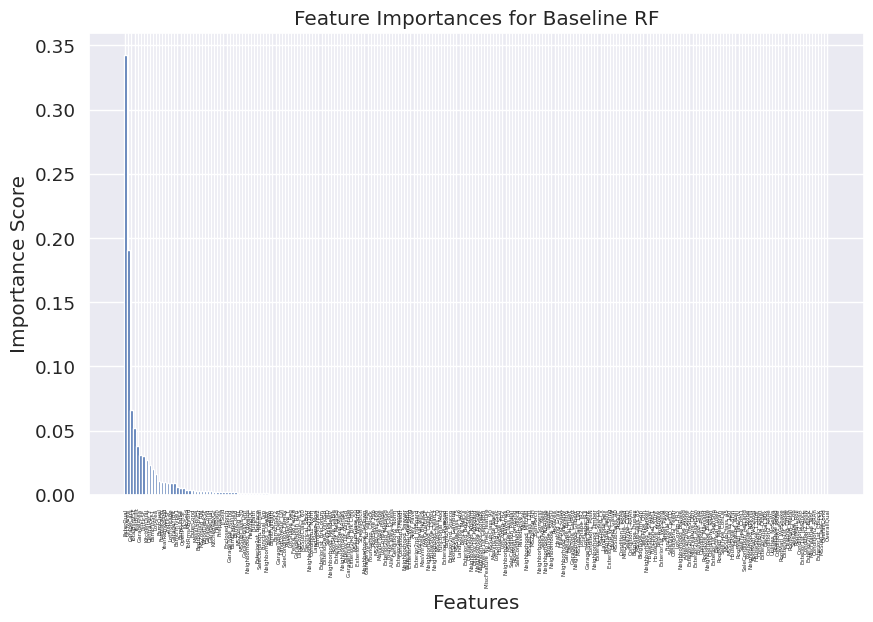

                Feature    Importance
0             ExterQual  3.426562e-01
1             GrLivArea  1.908449e-01
2            GarageCars  6.605056e-02
3           TotalBsmtSF  5.211465e-02
4             YearBuilt  3.821130e-02
..                  ...           ...
225     Condition2_RRAn  1.497995e-09
226  Exterior1st_CBlock  0.000000e+00
227      MSSubClass_150  0.000000e+00
228         OverallCond  0.000000e+00
229         OverallQual  0.000000e+00

[230 rows x 2 columns]


In [ ]:
# Extract feature importances
feature_importances_rf_baseline = rf_baseline.feature_importances_

# Sort feature importances in descending order
sorted_indices_rf_baseline = np.argsort(feature_importances_rf_baseline)[::-1]

# Show figure
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Baseline RF")
plt.bar(range(X_train.shape[1]), feature_importances_rf_baseline[sorted_indices_rf_baseline])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_rf_baseline], rotation=90, fontsize=4)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# view sorted importance
sorted_feature_importances_rf_baseline = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices_rf_baseline],
    'Importance': feature_importances_rf_baseline[sorted_indices_rf_baseline]
})
print(sorted_feature_importances_rf_baseline)

### Hyperparameter Tuning (cross-validation)

#### Randomized Search
Start with RandomizedSearchCV because it samples a subset of possible hyperparameters and, therefore, is more efficient.

In [ ]:
# Define parameter space
rf_random_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# RandomizedSearchCV with RepeatedKFold
cv_strategy_rf_random = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_random_params, n_iter=30, cv=cv_strategy_rf_random, n_jobs=-1,
    scoring='neg_root_mean_squared_error', random_state=42, verbose=2
)

# Fit the model on the training data
rf_random_search.fit(X_train, y_train)

# Retrieve the best-performing model configured with the optimal hyperparameters found during the randomized search.
rf_best_random = rf_random_search.best_estimator_

# Predict on the test set
rf_random_predictions = rf_best_random.predict(X_test)

# Calculate RMSE
rf_random_rmse = np.sqrt(mean_squared_error(y_train, rf_best_random.predict(X_train)))
print(f"Randomized Search Random Forest RMSE: {rf_random_rmse}")

# also generate R-squared
print(f"Randomized Search Random Forest R2 Score: {r2_score(y_train, rf_best_random.predict(X_train))}")

Fitting 15 folds for each of 30 candidates, totalling 450 fits
Randomized Search Random Forest RMSE: 0.055589970773785996
Randomized Search Random Forest R2 Score: 0.9806196533054474


##### Feature importance

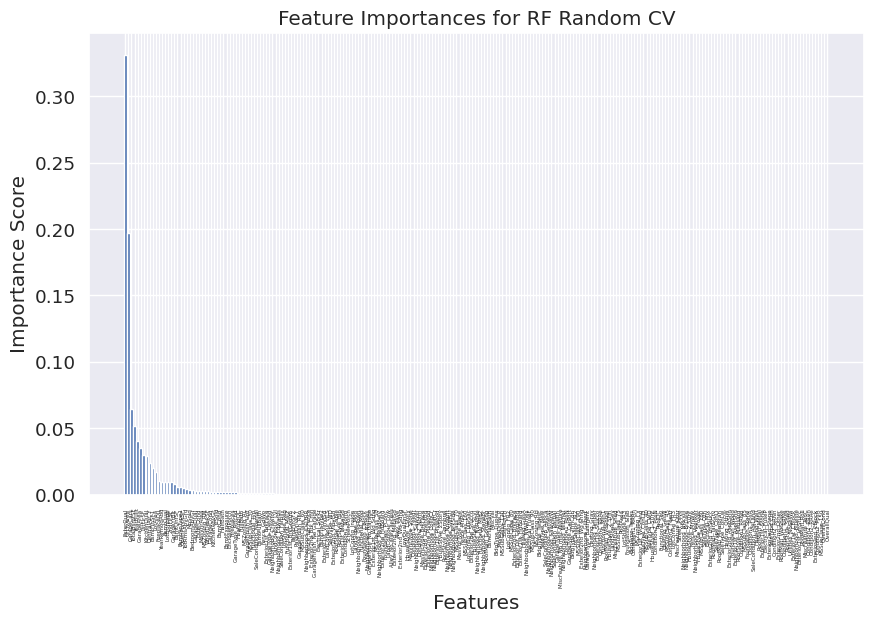

                Feature    Importance
0             ExterQual  3.311609e-01
1             GrLivArea  1.971511e-01
2            GarageCars  6.432322e-02
3           TotalBsmtSF  5.148271e-02
4             YearBuilt  4.030243e-02
..                  ...           ...
225  Exterior2nd_CBlock  3.303787e-09
226     Condition2_PosA  2.073129e-09
227      MSSubClass_150  0.000000e+00
228         OverallCond  0.000000e+00
229         OverallQual  0.000000e+00

[230 rows x 2 columns]


In [ ]:
# Extract feature importances
feature_importances_rf_best_random = rf_best_random.feature_importances_

# Sort feature importances in descending order
sorted_indices_rf_best_random = np.argsort(feature_importances_rf_best_random)[::-1]

# Show figure
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for RF Random CV")
plt.bar(range(X_train.shape[1]), feature_importances_rf_best_random[sorted_indices_rf_best_random])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_rf_best_random], rotation=90, fontsize=4)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# view sorted importance
sorted_indices_rf_best_random = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices_rf_best_random],
    'Importance': feature_importances_rf_best_random[sorted_indices_rf_best_random]
})
print(sorted_indices_rf_best_random)

#### Grid Search
RandomizedSearchCV narrowed down a good range of hyperparameters. These can be used in a GridSearchCV for a more exhaustive searching.

In [ ]:
# Define parameter grid
rf_grid_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# GridSearchCV
cv_strategy_rf_grid = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_grid_params, cv=cv_strategy_rf_grid, n_jobs=-1,
    scoring='neg_root_mean_squared_error', verbose=2
)

# Fit the model on the training data
rf_grid_search.fit(X_train, y_train)

# Retrieve the best-performing model configured with the optimal hyperparameters found during the grid search.
rf_best_grid = rf_grid_search.best_estimator_

# Predict on the test set
rf_grid_predictions = rf_best_grid.predict(X_test)

# Calculate RMSE
rf_grid_rmse = np.sqrt(mean_squared_error(y_train, rf_best_grid.predict(X_train)))
print(f"Grid Search Random Forest RMSE: {rf_grid_rmse}")

# also generate R-squared
print(f"Grid Search Random Forest R2 Score: {r2_score(y_train, rf_best_grid.predict(X_train))}")

Fitting 15 folds for each of 45 candidates, totalling 675 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Grid Search Random Forest RMSE: 0.055589970773785996
Grid Search Random Forest R2 Score: 0.9806196533054474


##### Feature importance

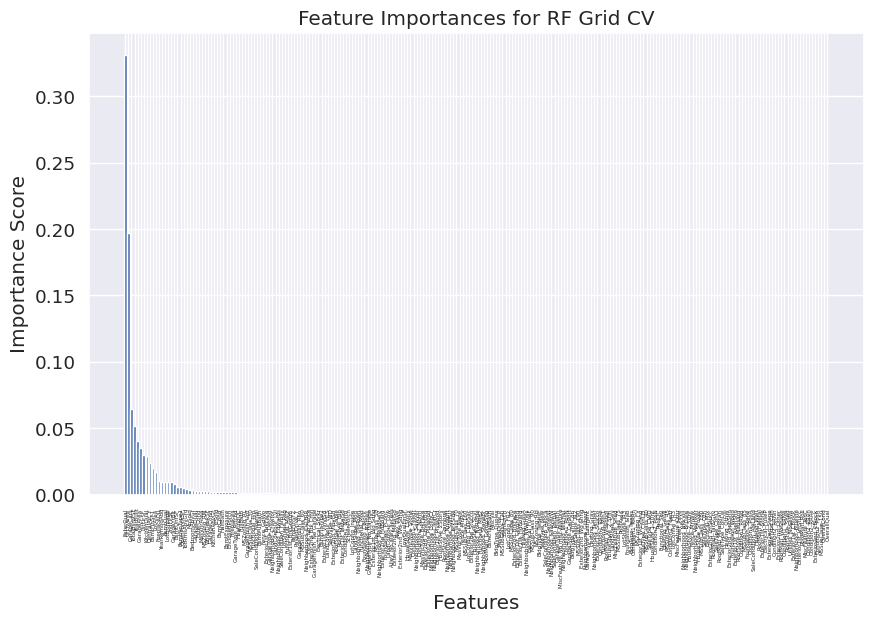

                Feature    Importance
0             ExterQual  3.311609e-01
1             GrLivArea  1.971511e-01
2            GarageCars  6.432322e-02
3           TotalBsmtSF  5.148271e-02
4             YearBuilt  4.030243e-02
..                  ...           ...
225  Exterior2nd_CBlock  3.303787e-09
226     Condition2_PosA  2.073129e-09
227      MSSubClass_150  0.000000e+00
228         OverallCond  0.000000e+00
229         OverallQual  0.000000e+00

[230 rows x 2 columns]


In [ ]:
# Extract feature importances
feature_importances_rf_best_grid = rf_best_grid.feature_importances_

# Sort feature importances in descending order
sorted_indices_rf_best_grid = np.argsort(feature_importances_rf_best_grid)[::-1]

# Show figure
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for RF Grid CV")
plt.bar(range(X_train.shape[1]), feature_importances_rf_best_grid[sorted_indices_rf_best_grid])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_rf_best_grid], rotation=90, fontsize=4)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# view sorted importance
sorted_indices_rf_best_grid = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices_rf_best_grid],
    'Importance': feature_importances_rf_best_grid[sorted_indices_rf_best_grid]
})
print(sorted_indices_rf_best_grid)

## XGBoost regressor (advanced model)

In [ ]:
# Initialize the baseline XGBoost Model
xgb_baseline = XGBRegressor(random_state=42, enable_categorical=True)

# Fit the model on the training data
xgb_baseline.fit(X_train, y_train)

# Predict on the test set
xgb_baseline_predictions = xgb_baseline.predict(X_test)

# Calculate RMSE
xgb_baseline_rmse = np.sqrt(mean_squared_error(y_train, xgb_baseline.predict(X_train)))
print(f"Baseline XGBoost RMSE: {xgb_baseline_rmse}")

# also generate R-squared
print(f"Baseline XGBoost R2 Score: {r2_score(y_train, xgb_baseline.predict(X_train))}")

Baseline XGBoost RMSE: 0.011206465668344167
Baseline XGBoost R2 Score: 0.9992123995050135


##### Feature importance

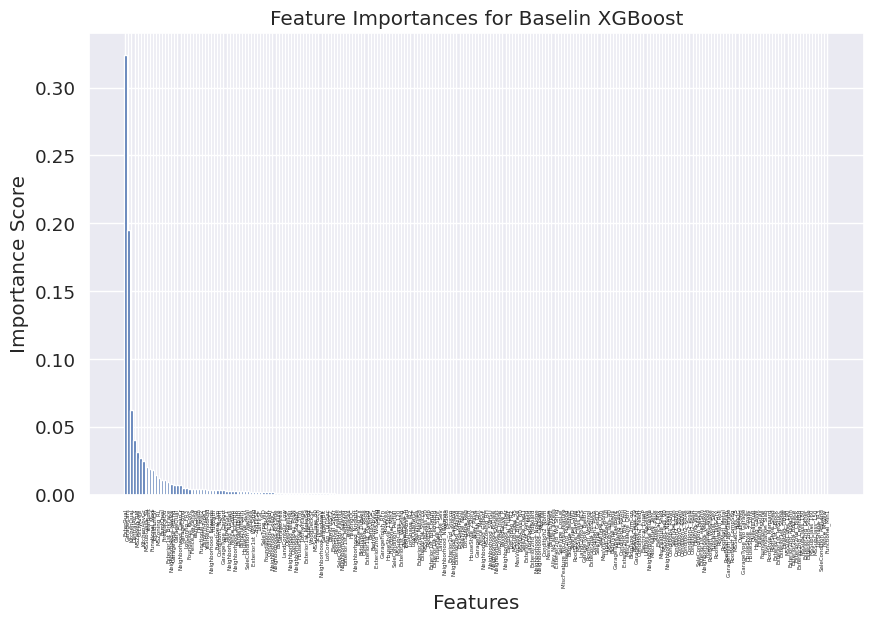

                   Feature  Importance
0                ExterQual    0.324202
1               GarageCars    0.195256
2              KitchenQual    0.062491
3             CentralAir_Y    0.040707
4              MSZoning_RM    0.031139
..                     ...         ...
225         MSSubClass_150    0.000000
226           LotShape_IR3    0.000000
227  SaleCondition_AdjLand    0.000000
228             Fence_MnWw    0.000000
229        Functional_Min1    0.000000

[230 rows x 2 columns]


In [ ]:
# Extract feature importances
feature_importances_xgb_baseline = xgb_baseline.feature_importances_

# Sort feature importances in descending order
sorted_indices_xgb_baseline = np.argsort(feature_importances_xgb_baseline)[::-1]

# Show figure
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Baselin XGBoost")
plt.bar(range(X_train.shape[1]), feature_importances_xgb_baseline[sorted_indices_xgb_baseline])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_xgb_baseline], rotation=90, fontsize=4)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# view sorted importance
sorted_indices_xgb_baseline = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices_xgb_baseline],
    'Importance': feature_importances_xgb_baseline[sorted_indices_xgb_baseline]
})
print(sorted_indices_xgb_baseline)

### Hyperparameter Tuning (cross-validation)

#### Randomized Search
A random sample of hyperparameters.

In [ ]:
# Define parameter space
xgb_random_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.2],
    'early_stopping_rounds': [10]
}

# Initialize the model with eval_metric set during initialization
xgb_random_model = XGBRegressor(
    random_state=42,
    early_stopping_rounds=10,
    eval_metric="rmse",
    enable_categorical=True
)

# RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_random_model,
    param_distributions=xgb_random_params, n_iter=30, cv=5, n_jobs=-1,
    scoring='neg_root_mean_squared_error', random_state=42, error_score='raise'
)

# Fit the model on the training data
xgb_random_search.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)],
)

# Retrieve the best-performing model configured with the optimal hyperparameters found during the randomized search
xgb_best_random = xgb_random_search.best_estimator_

# Predict on the test set
xgb_random_predictions = xgb_best_random.predict(X_test)

# Calculate RMSE
xgb_random_rmse = np.sqrt(mean_squared_error(y_train, xgb_best_random.predict(X_train)))
print(f"Randomized Search XGBoost RMSE: {xgb_random_rmse}")

# also generate R-squared
print(f"Randomized Search XGBoost R2 Score: {r2_score(y_train, xgb_best_random.predict(X_train))}")

[0]	validation_0-rmse:0.38583
[1]	validation_0-rmse:0.37317
[2]	validation_0-rmse:0.36128
[3]	validation_0-rmse:0.35006
[4]	validation_0-rmse:0.33947
[5]	validation_0-rmse:0.32883
[6]	validation_0-rmse:0.31898
[7]	validation_0-rmse:0.30938
[8]	validation_0-rmse:0.30030
[9]	validation_0-rmse:0.29159
[10]	validation_0-rmse:0.28324
[11]	validation_0-rmse:0.27541
[12]	validation_0-rmse:0.26813
[13]	validation_0-rmse:0.26098
[14]	validation_0-rmse:0.25430
[15]	validation_0-rmse:0.24798
[16]	validation_0-rmse:0.24209
[17]	validation_0-rmse:0.23638
[18]	validation_0-rmse:0.23114
[19]	validation_0-rmse:0.22604
[20]	validation_0-rmse:0.22107
[21]	validation_0-rmse:0.21648
[22]	validation_0-rmse:0.21215
[23]	validation_0-rmse:0.20813
[24]	validation_0-rmse:0.20418
[25]	validation_0-rmse:0.20033
[26]	validation_0-rmse:0.19670
[27]	validation_0-rmse:0.19321
[28]	validation_0-rmse:0.18968
[29]	validation_0-rmse:0.18623
[30]	validation_0-rmse:0.18329
[31]	validation_0-rmse:0.18034
[32]	validation_0-

##### Feature importance

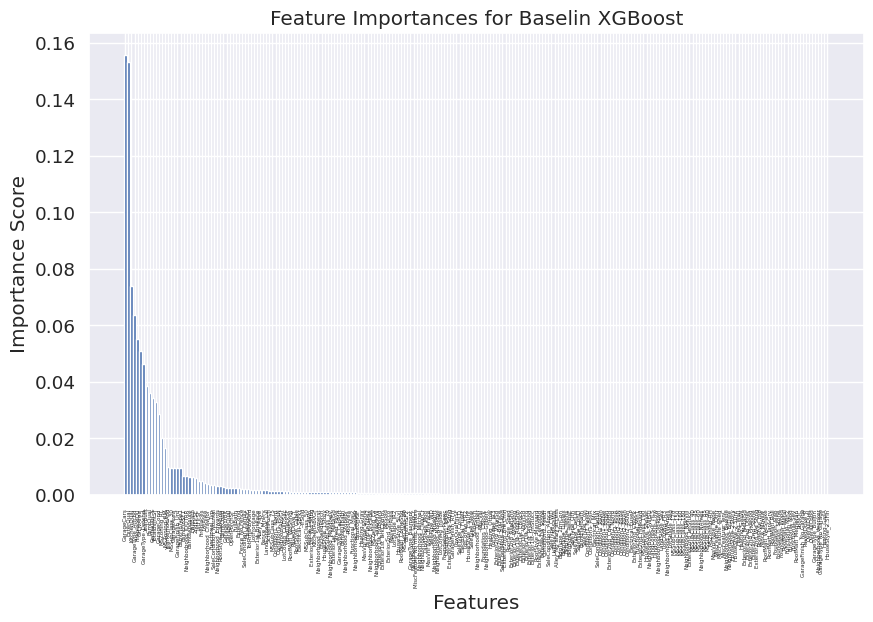

                  Feature  Importance
0              GarageCars    0.155804
1               ExterQual    0.153405
2             KitchenQual    0.073976
3       GarageType_Attchd    0.063734
4             FireplaceQu    0.055181
..                    ...         ...
225    GarageType_BuiltIn    0.000000
226  Neighborhood_Veenker    0.000000
227  GarageType_No Garage    0.000000
228          Heating_GasA    0.000000
229     HouseStyle_2.5Fin    0.000000

[230 rows x 2 columns]


In [ ]:
# Extract feature importances
feature_importances_xgb_best_random = xgb_best_random.feature_importances_

# Sort feature importances in descending order
sorted_indices_xgb_best_random = np.argsort(feature_importances_xgb_best_random)[::-1]

# Show figure
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Baselin XGBoost")
plt.bar(range(X_train.shape[1]), feature_importances_xgb_best_random[sorted_indices_xgb_best_random])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_xgb_best_random], rotation=90, fontsize=4)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# view sorted importance
sorted_indices_xgb_best_random = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices_xgb_best_random],
    'Importance': feature_importances_xgb_best_random[sorted_indices_xgb_best_random]
})
print(sorted_indices_xgb_best_random)

#### Grid Search
RandomizedSearchCV found a good range of hyperparameters. This can be fine-tuned with GridSearchCV to explore more specific values for the parameters.

In [ ]:
# Define parameter grid
xgb_grid_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize the model with eval_metric set during initialization
xgb_grid_model = XGBRegressor(
    random_state=42,
    eval_metric="rmse",
    enable_categorical=True
)

# GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb_grid_model,
    param_grid=xgb_grid_params, cv=5, n_jobs=-1,
    scoring='neg_root_mean_squared_error', error_score='raise'
)

# Fit the model on the training data
xgb_grid_search.fit(X_train, y_train)

# Retrieve the best-performing model configured with the optimal hyperparameters found during the grid search.
xgb_best_grid = xgb_grid_search.best_estimator_

# Predict on the test set
xgb_grid_predictions = xgb_best_grid.predict(X_test)

# Calculate RMSE
xgb_grid_rmse = np.sqrt(mean_squared_error(y_train, xgb_best_grid.predict(X_train)))
print(f"Grid Search XGBoost RMSE: {xgb_grid_rmse}")

# also generate R-squared
print(f"Grid Search XGBoost R2 Score: {r2_score(y_train, xgb_best_grid.predict(X_train))}")

Grid Search XGBoost RMSE: 0.07786307866663704
Grid Search XGBoost R2 Score: 0.9619782770081249


##### Feature importance

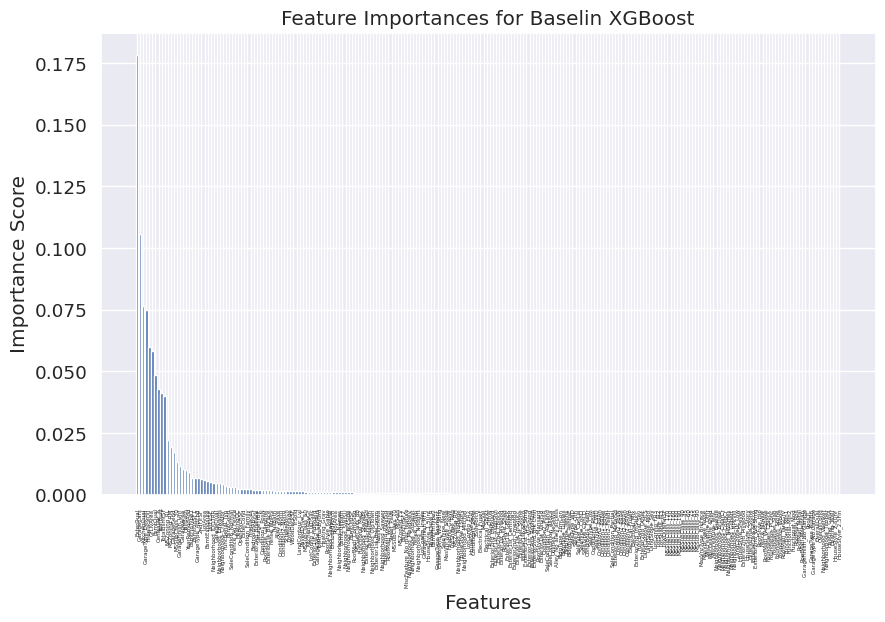

                 Feature  Importance
0              ExterQual    0.178414
1             GarageCars    0.105666
2            KitchenQual    0.076521
3      GarageType_Detchd    0.075079
4            FireplaceQu    0.059816
..                   ...         ...
225  Neighborhood_Timber    0.000000
226         Heating_GasA    0.000000
227         Heating_Wall    0.000000
228    HouseStyle_2.5Unf    0.000000
229    HouseStyle_2.5Fin    0.000000

[230 rows x 2 columns]


In [ ]:
# Extract feature importances
feature_importances_xgb_best_grid = xgb_best_grid.feature_importances_

# Sort feature importances in descending order
sorted_indices_xgb_best_grid = np.argsort(feature_importances_xgb_best_grid)[::-1]

# Show figure
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Baselin XGBoost")
plt.bar(range(X_train.shape[1]), feature_importances_xgb_best_grid[sorted_indices_xgb_best_grid])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices_xgb_best_grid], rotation=90, fontsize=4)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# view sorted importance
sorted_indices_xgb_best_grid = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices_xgb_best_grid],
    'Importance': feature_importances_xgb_best_grid[sorted_indices_xgb_best_grid]
})
print(sorted_indices_xgb_best_grid)

## Ensemble model

In [ ]:
# import packages
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

In [ ]:
# Define base models
base_models = [
    ('rf_baseline', rf_baseline),
    ('rf_random', rf_best_random),
    ('rf_grid', rf_best_grid),
    ('xgb_baseline', xgb_baseline),
    ('xgb_random', xgb_best_random),
    ('xgb_grid', xgb_best_grid)
]

# Use Ridge as the meta-model estimator
final_estimator = Ridge(alpha=1.0)

# Disable early stopping in XGBoost models
xgb_baseline.set_params(early_stopping_rounds=None, eval_set=None)
xgb_best_random.set_params(early_stopping_rounds=None, eval_set=None)
xgb_best_grid.set_params(early_stopping_rounds=None, eval_set=None)

# Create Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5,  # Cross-validation folds
    n_jobs=-1,
    passthrough=False # This ensures the base estimators are refitted on the entire training set before being used in the final stacking model.
)

# Train the stacking model
stacking_regressor.fit(X_train, y_train)

# Make predictions
stacked_predictions = stacking_regressor.predict(X_test)

# Evaluate performance
stacked_rmse = np.sqrt(mean_squared_error(y_train, stacking_regressor.predict(X_train)))
print(f"Stacking Regressor RMSE: {stacked_rmse:.4f}")
stacked_r2 = r2_score(y_train, stacking_regressor.predict(X_train))
print(f"Stacking Regressor R2 Score: {stacked_r2:.4f}")

Stacking Regressor RMSE: 0.0671
Stacking Regressor R2 Score: 0.9718


# Model selection

In [ ]:
# Collect RMSE scores for all models
model_rmse_scores = {
    "Model": [
        "Random Forest (Baseline)",
        "Random Forest (Randomized Search)",
        "Random Forest (Grid Search)",
        "XGBoost (Baseline)",
        "XGBoost (Randomized Search)",
        "XGBoost (Grid Search)",
        "Ensemble (Stacking)"
    ],
    "Model Type": [
        "Random Forest",
        "Random Forest",
        "Random Forest",
        "XGBoost",
        "XGBoost",
        "XGBoost",
        "Ensemble"
    ],
    "RMSE Score": [
        rf_baseline_rmse,
        rf_random_rmse,
        rf_grid_rmse,
        xgb_baseline_rmse,
        xgb_random_rmse,
        xgb_grid_rmse,
        stacked_rmse
    ]
}

# Create a DataFrame
df_rmse_scores = pd.DataFrame(model_rmse_scores)

# Sort the DataFrame by RMSE Score in descending order
df_sorted_rmse_scores = df_rmse_scores.sort_values(by="RMSE Score", ascending=True)

# Display the sorted table
print(df_sorted_rmse_scores)

# Find the model with the best RMSE
best_model_idx = df_rmse_scores['RMSE Score'].idxmin()
best_model_name = df_rmse_scores.loc[best_model_idx, 'Model']
best_rmse_score = df_rmse_scores.loc[best_model_idx, 'RMSE Score']

# Choose predictions based on the best model
if best_model_name == "Random Forest (Baseline)":
    final_predictions = rf_baseline_predictions
elif best_model_name == "Random Forest (Randomized Search)":
    final_predictions = rf_random_predictions
elif best_model_name == "Random Forest (Grid Search)":
    final_predictions = rf_grid_predictions
elif best_model_name == "XGBoost (Baseline)":
    final_predictions = xgb_baseline_predictions
elif best_model_name == "XGBoost (Randomized Search)":
    final_predictions = xgb_random_predictions
elif best_model_name == "XGBoost (Grid Search)":
    final_predictions = xgb_grid_predictions
elif best_model_name == "Ensemble (Stacking)":
    final_predictions = stacked_predictions


# Print the best model's information
print(f"Best Model = {best_model_name} (RMSE = {best_rmse_score})")

                               Model     Model Type  RMSE Score
3                 XGBoost (Baseline)        XGBoost    0.011206
1  Random Forest (Randomized Search)  Random Forest    0.055590
2        Random Forest (Grid Search)  Random Forest    0.055590
0           Random Forest (Baseline)  Random Forest    0.057123
6                Ensemble (Stacking)       Ensemble    0.067069
4        XGBoost (Randomized Search)        XGBoost    0.077698
5              XGBoost (Grid Search)        XGBoost    0.077863
Best Model = XGBoost (Baseline) (RMSE = 0.011206465668344167)


# Make Predictions
Fit the best-tuned model using the <b>entire training set</b> (not just the train-validation split used for tuning). Then, make predictions on the test set.

In [ ]:
# The model with the best fit (lowest RMSE) was the Baseline XGBoost Regressor model
final_predictions = xgb_baseline_predictions

# Reverse the log-transformation of SalePrice
final_predictions_transformed = np.exp(final_predictions)

# Create CSV submission
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": final_predictions_transformed
})

submission.to_csv("/content/drive/MyDrive/ACADEMIA/DATA SCIENCE PROJECTS/Kaggle house prices/submission.csv", index=False)

# View submission
submission.head()

,Id,SalePrice
0,1461,115421.773438
1,1462,168400.359375
2,1463,190928.203125
3,1464,184081.453125
4,1465,193627.359375
